In [37]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

nnfs.init()

In [46]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        #weights shape = (n_inputs, n_neurons)
        self.weights = 0.01*np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, input):
        #input shape = (1, len(input))
        self.output = np.dot(input, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self,arr):
    # subtracting max num from the arr, this does not effect the end result
    # row wise only, while maintaining original demensions
        exp_vals = np.exp(arr - np.max(arr, axis=1, keepdims=1))
        probabilities = exp_vals / np.sum(exp_vals, axis=1, keepdims=1)
        self.output = probabilities

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -

        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]
                
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

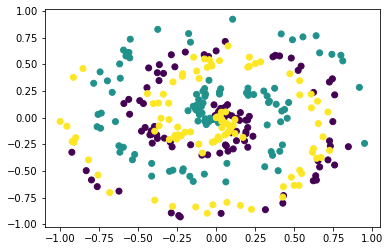

In [47]:
# Init data with 3 classes
X, y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0], X[:,1], c=y)

In [49]:
#create a layer with 2 input features and 3 neutrons
#input shape (300,2)
#layer shape (2,3)
#(300,2) *(2,3) = (300, 3)
layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
layer2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()
layer1.forward(X)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)


loss = loss_function.calculate(activation2.output, y)
print(loss)

#activation2.output[:3] debug

1.0986117


In [41]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0,1,2], class_targets])


[0.7 0.5 0.9]


In [42]:
for index, output in zip(class_targets, softmax_outputs):
    print(index, output, output[index])
    

0 [0.7 0.1 0.2] 0.7
1 [0.1 0.5 0.4] 0.5
1 [0.02 0.9  0.08] 0.9


In [43]:
negative_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
avg_loss = np.mean(negative_log)
print(avg_loss)

0.38506088005216804
